In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salary.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


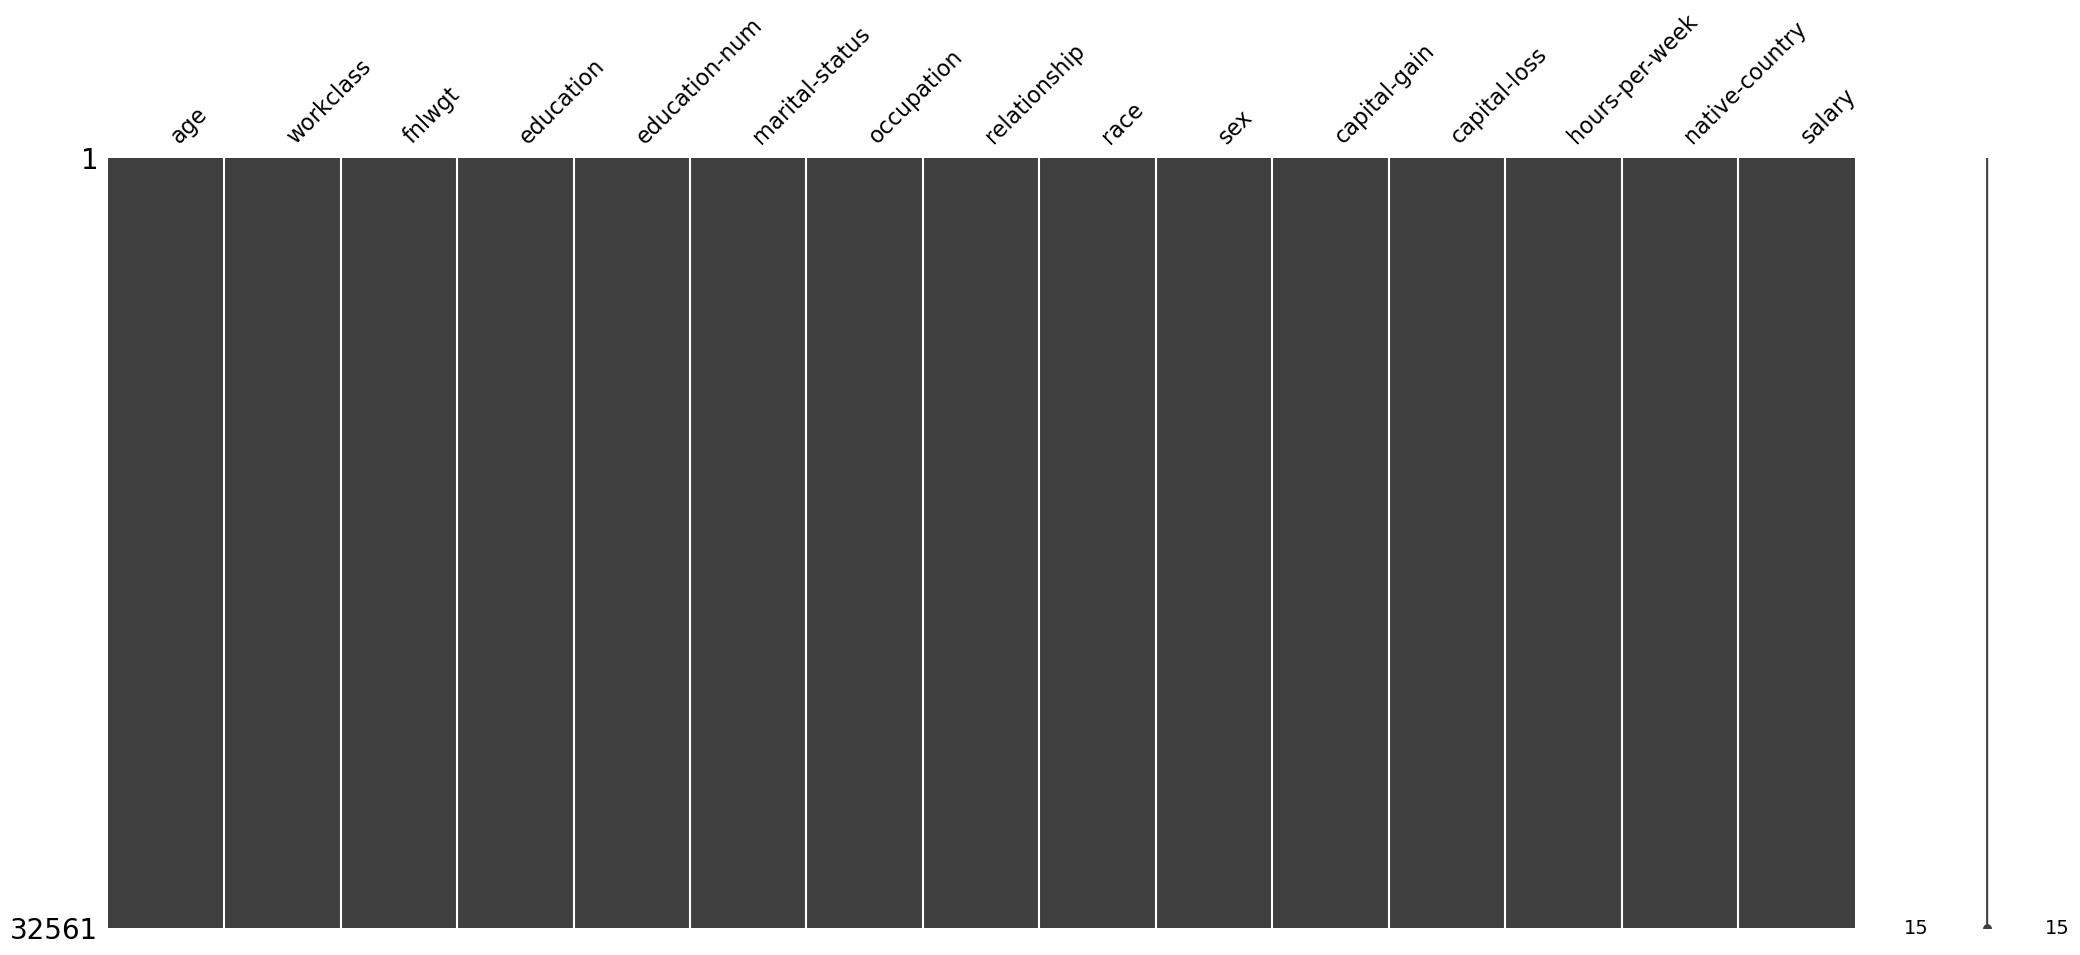

In [3]:
import missingno as mso
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
mso.matrix(df)
plt.show()

In [4]:
df.duplicated().sum()

24

In [5]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#checking for unique values

df.select_dtypes(include = 'object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
salary             2
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [8]:
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int6

In [9]:
import pandas as pd

# Assuming df is your DataFrame
df_onehot = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df_onehot

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,Bachelors,13,2174,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,Bachelors,13,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,11th,7,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Bachelors,13,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,HS-grad,9,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,HS-grad,9,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,HS-grad,9,0,0,20,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df_onehot['education'] = label_encoder.fit_transform(df['education'])


In [13]:
df_onehot

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,9,13,2174,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,13,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,9,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,7,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,13,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,12,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,11,9,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,11,9,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,11,9,0,0,20,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df_onehot['salary']=df_onehot['salary'].apply(lambda x: 0 if x == ' <=50K' else 1)

In [15]:
df_onehot["salary"].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [16]:
df0,df1 = df_onehot["salary"].value_counts()

In [17]:
df0_dataframe = df_onehot[df_onehot["salary"] == 0]

In [18]:
df0_dataframe

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,9,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,116138,12,14,0,0,11,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32555,22,310152,15,10,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,27,257302,7,12,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,11,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df1_dataframe = df_onehot[df_onehot["salary"] == 1]

In [20]:
df1_over = df1_dataframe.sample(df0,replace = True)

In [21]:
df_balanced = pd.concat([df1_over,df0_dataframe],axis = 0)

In [22]:
df_balanced

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
9639,46,330087,9,13,0,0,55,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25831,31,147284,10,16,0,1977,99,1,0,0,...,0,0,0,0,0,0,0,1,0,0
31054,50,34067,8,11,0,0,50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
19069,55,31728,15,10,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
26202,46,251474,9,13,0,0,60,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,116138,12,14,0,0,11,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32555,22,310152,15,10,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,27,257302,7,12,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,11,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df_balanced["salary"].value_counts()

1    24720
0    24720
Name: salary, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = df_balanced.drop("salary", axis=1)


In [26]:
y = df_balanced["salary"]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state  = 42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
model.score(x_test,y_test)

0.9350728155339806

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
clf = cross_val_score(model,x,y,cv = 5)

In [34]:
clf

array([0.93406149, 0.93203883, 0.93203883, 0.93901699, 0.93406149])

In [35]:
average = clf.mean()

In [36]:
average

0.9342435275080906